In [ ]:
#IMPORTAÇÕES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data', names = cols)
#o dataset em questão não tem os labels

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'].unique()
#representam gamas ou hadrons

array(['g', 'h'], dtype=object)

In [ ]:
#como o computador não é muito bom em entender letras, mas sim números, vamos converter g para 0 e h para 1
df['class'] = (df['class'] == 'g').astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

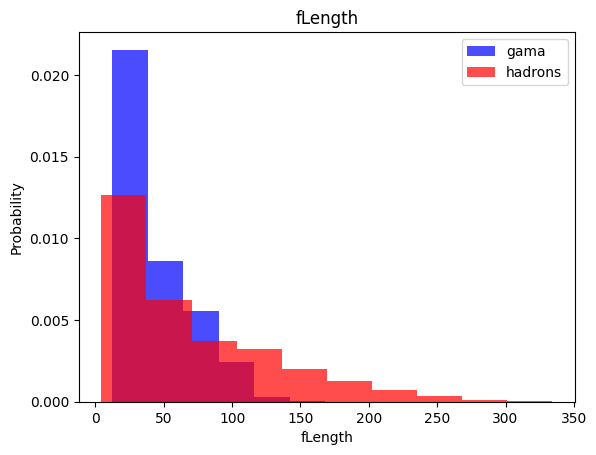

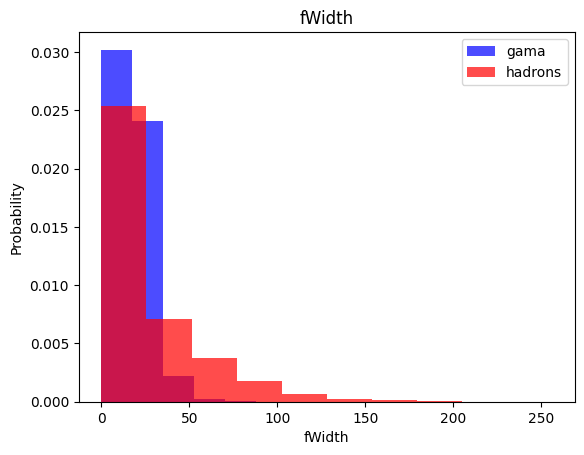

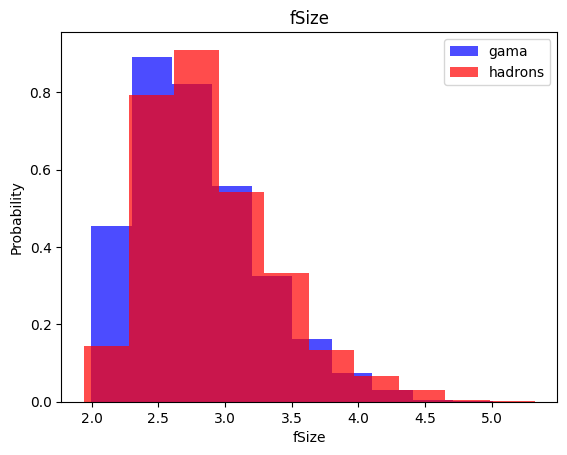

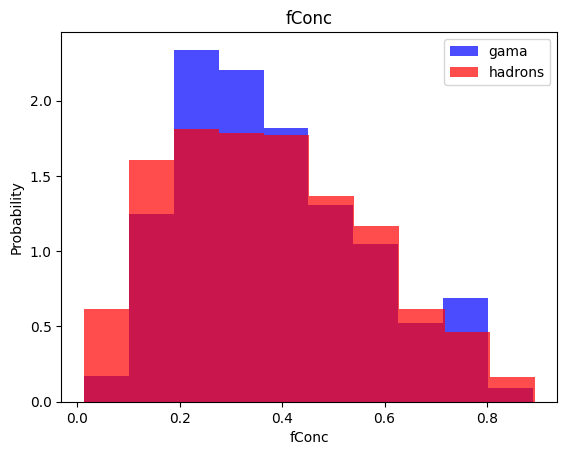

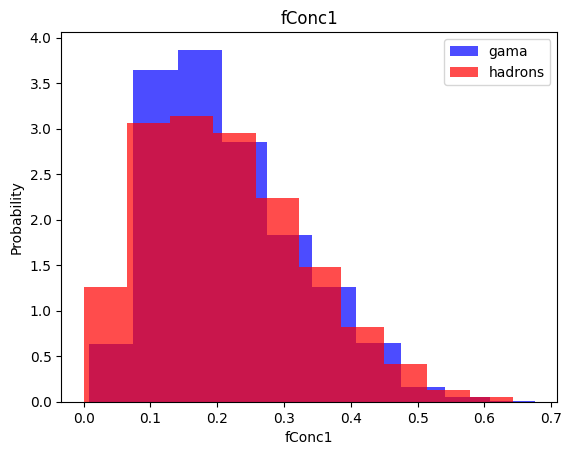

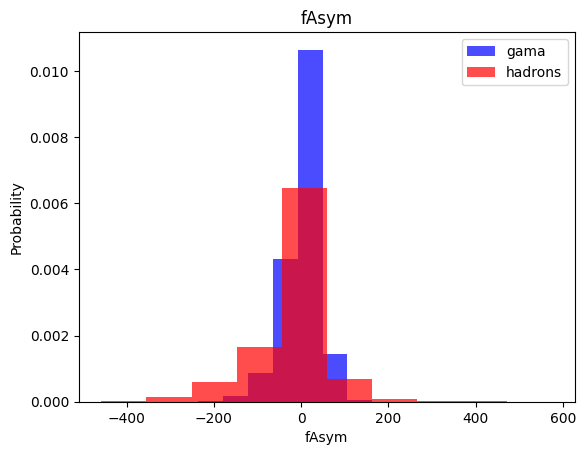

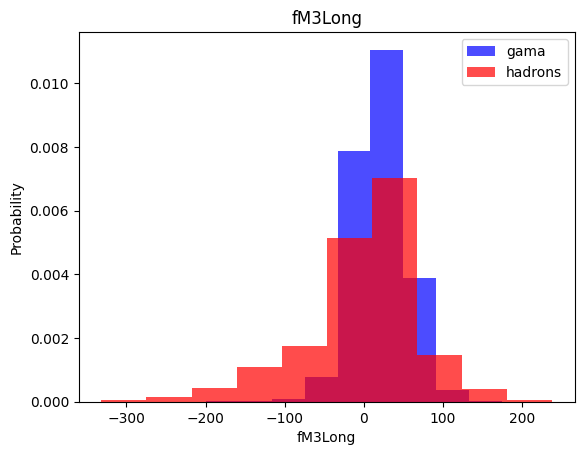

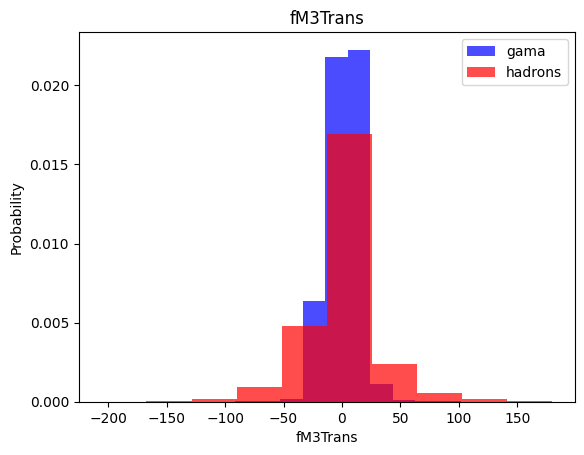

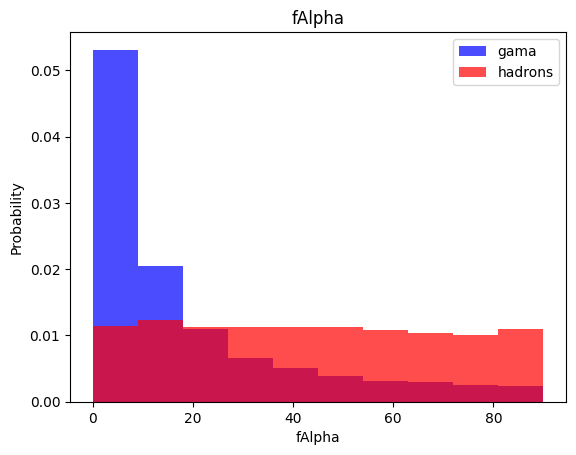

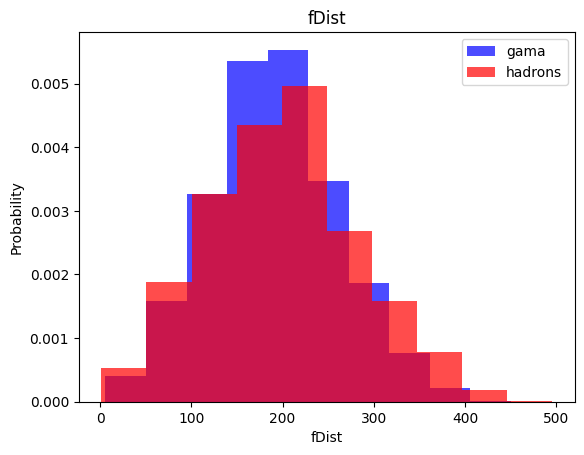

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color = 'blue', label = 'gama', alpha = 0.7, density = True)
  plt.hist(df[df['class'] == 0][label], color = 'red', label = 'hadrons', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test datasets

In [ ]:
#train de 0 a 60%, valid de 60% a 80% e test de 80% a 100%
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  #os valores do dataset estão distantes, ex: 28.7967	 e 0.3918
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)

  #pilha H pega dois array e os empilha horizontalmente
  #x é bidimensional e y é unidimensional
  data = np.hstack((x, np.reshape(y, (-1,1))))

  return data, x, y

In [ ]:
print(len(train[train['class']==1])) #gama
print(len(train[train['class']==0])) #hadrons
#temos mais gamas que hadrons, então vamos fazer um OVERSAMPLING no nosso conjunto de dados de treinamento,vamos aumentar o tamanho dos hadrons para que seja o mesmo que os gamas

7420
3992


In [ ]:
train, x_train, y_train = scale_dataset(train,oversample = True)

In [ ]:
len(y_train)

14840

In [ ]:
sum(y_train==1)

7420

In [ ]:
sum(y_train==0)

7420

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample = True)
#false pois validação e teste é para dadaos que eu ainda não vi, como a amostra se comporta
valid, x_valid, y_valid = scale_dataset(valid, oversample = False)
test, x_test, y_test = scale_dataset(test, oversample = False)

#KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
y_test

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
#relatorio de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1360
           1       0.83      0.88      0.85      2444

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.81      0.80      3804



# Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.53      1360
           1       0.74      0.91      0.81      2444

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



#Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1360
           1       0.84      0.83      0.83      2444

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1360
           1       0.89      0.90      0.89      2444

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)


In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32
119/119 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.01, batch size 64
119/119 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8825
16 nodes, dropout 0, lr 0.01, batch size 128
119/119 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.005, batch size 32
119/119 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.005, batch size 64
119/119 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.005, batch size 128
119/119 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8736
16 nodes, dropout 0, lr 0.001, batch size 32
119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8741
16 nodes, dropout 0, lr 0.001, batch size 64
119/119 [=========

<ipython-input-34-cddf62d7debd>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


119/119 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8591
32 nodes, dropout 0, lr 0.005, batch size 32
119/119 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8615
32 nodes, dropout 0, lr 0.005, batch size 64
119/119 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.005, batch size 128
119/119 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8749
32 nodes, dropout 0, lr 0.001, batch size 32
119/119 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.001, batch size 64
119/119 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8693
32 nodes, dropout 0, lr 0.001, batch size 128
119/119 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.01, batch size 32
119/119 [==============================] - 0s 1ms/step - lo

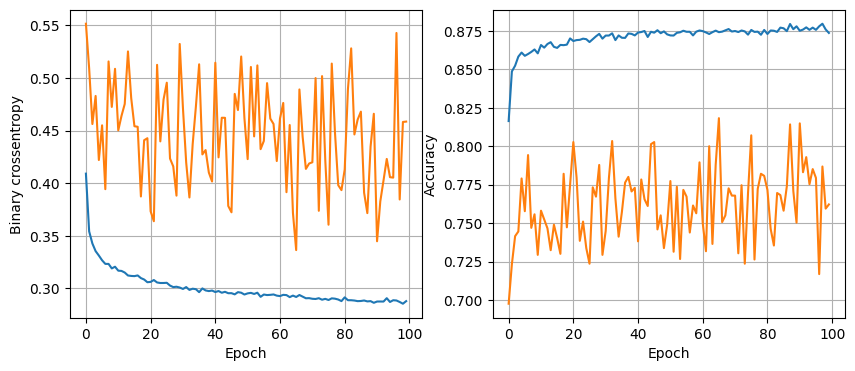

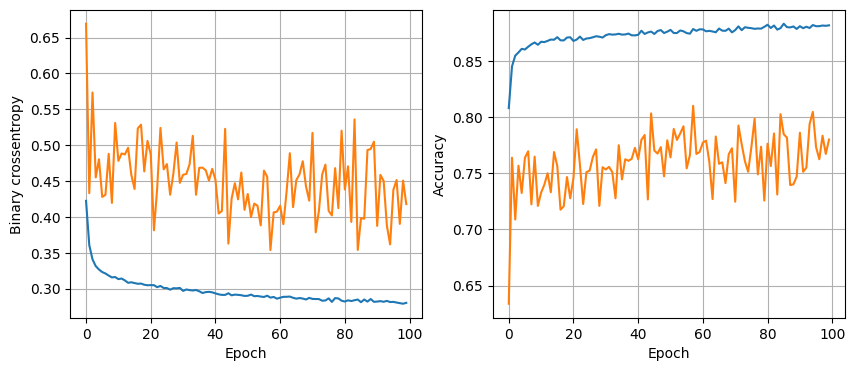

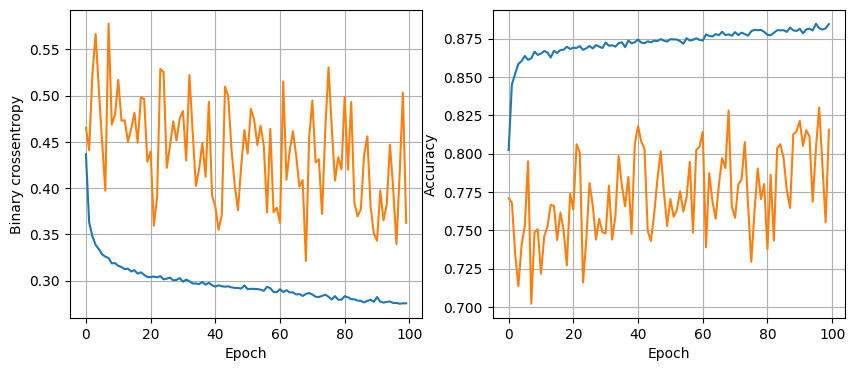

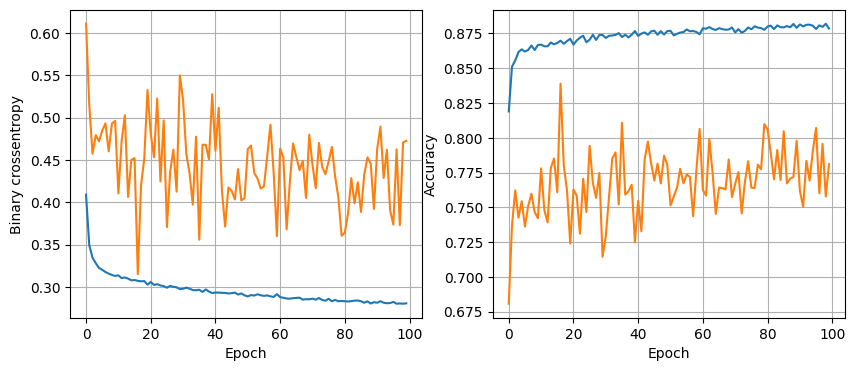

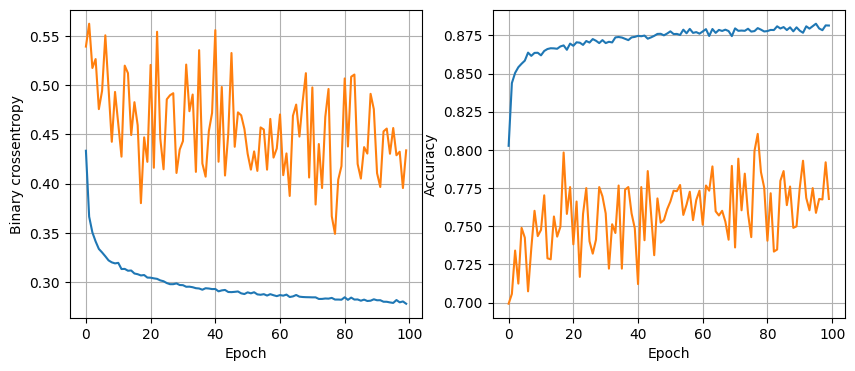

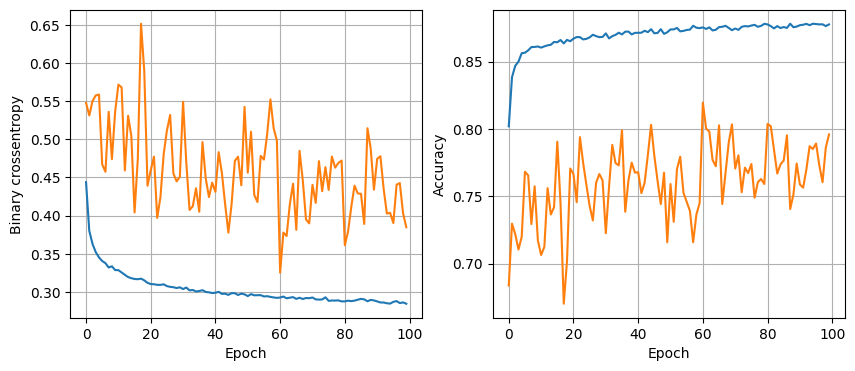

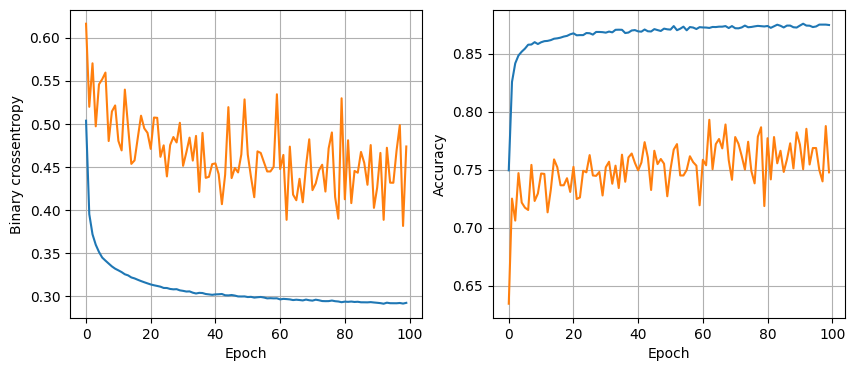

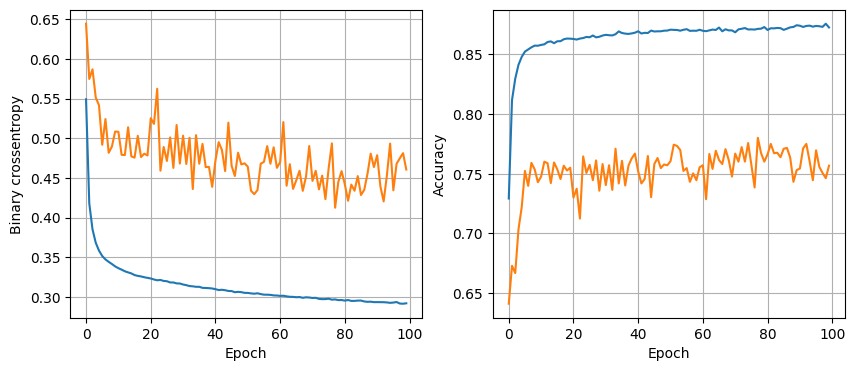

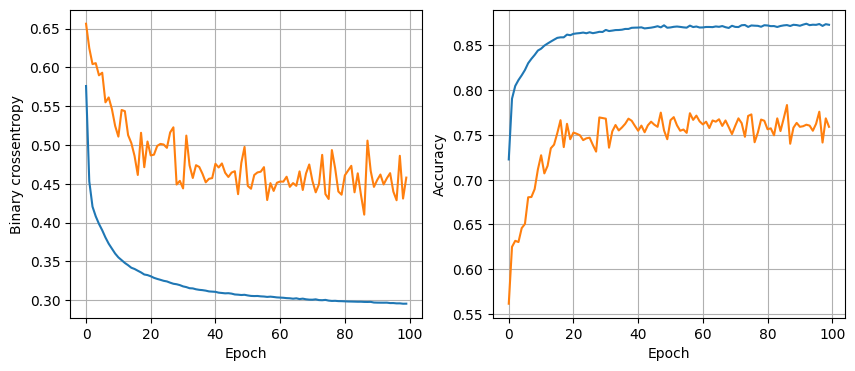

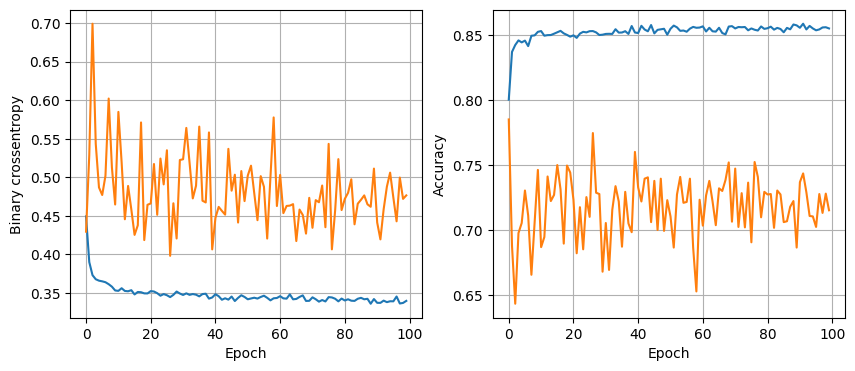

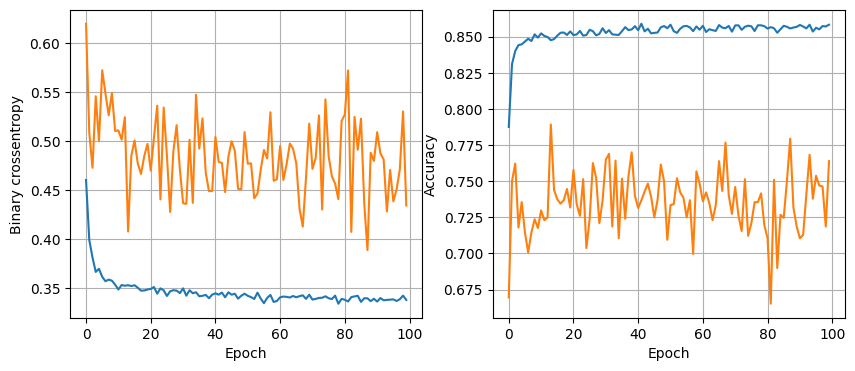

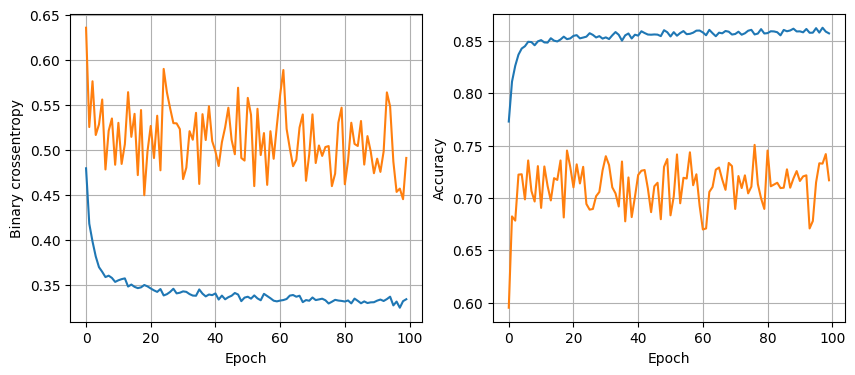

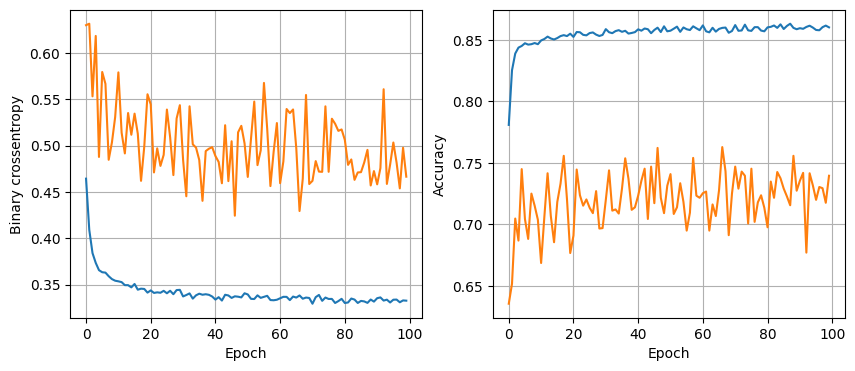

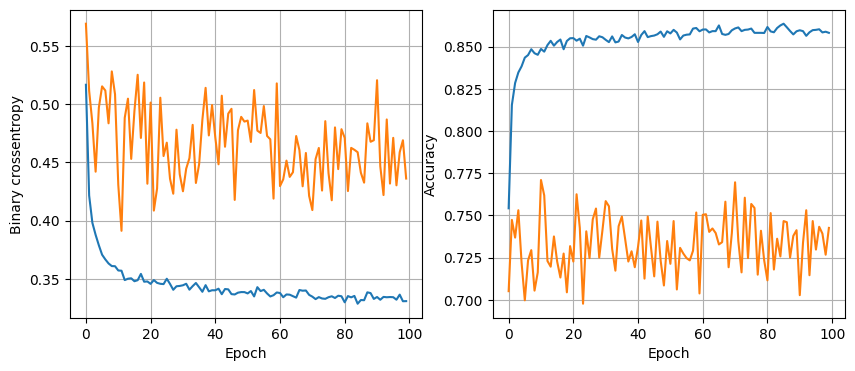

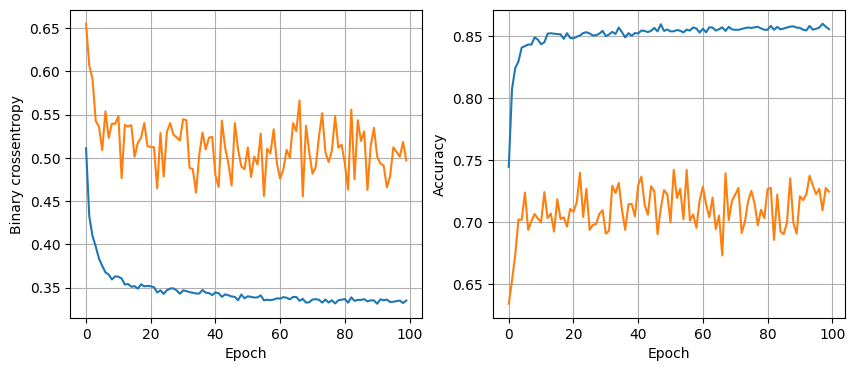

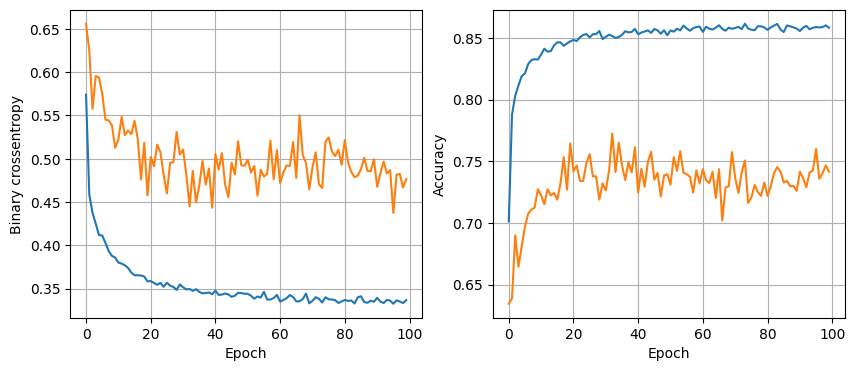

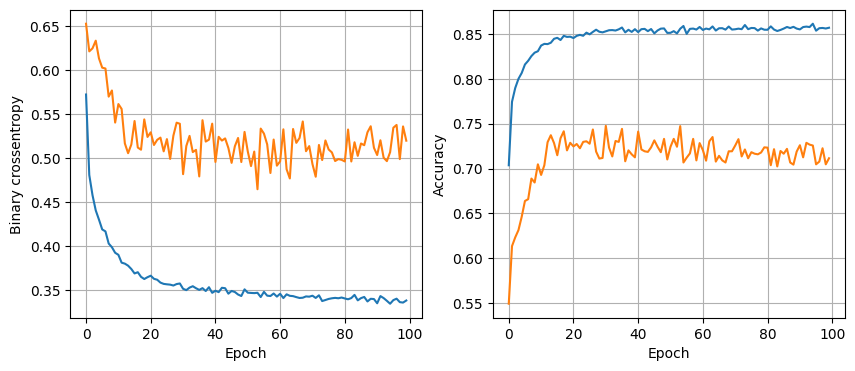

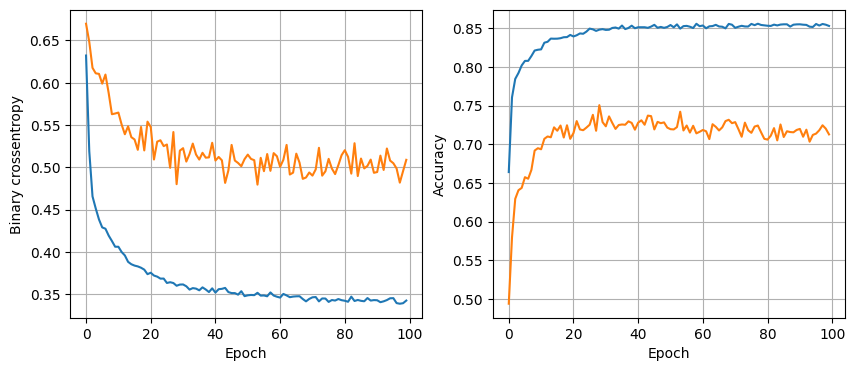

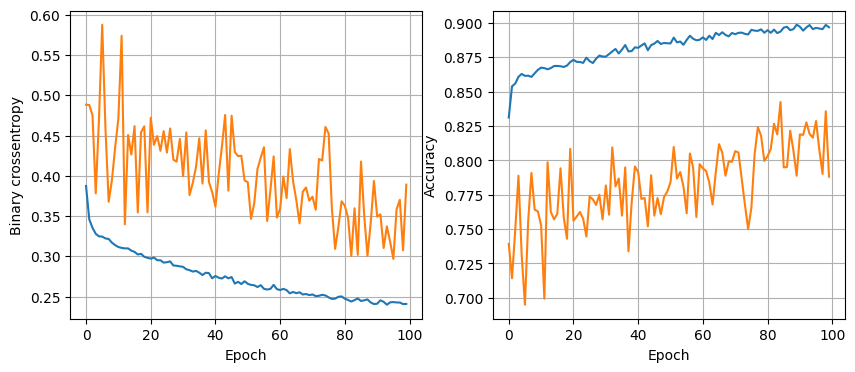

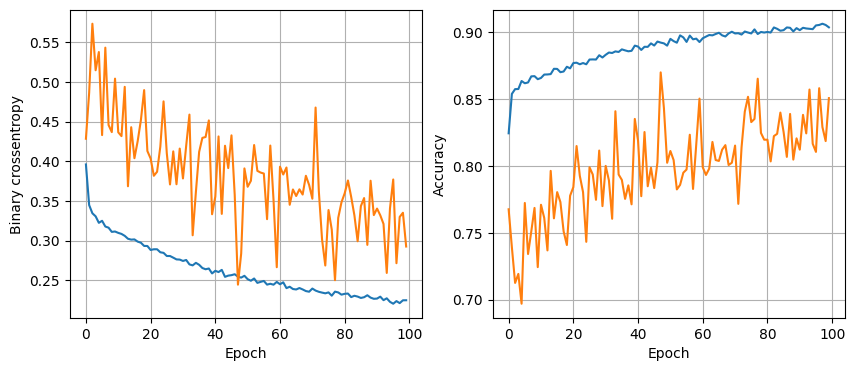

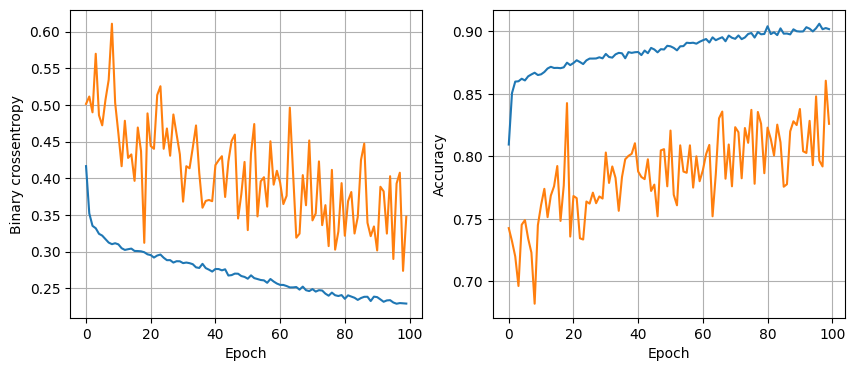

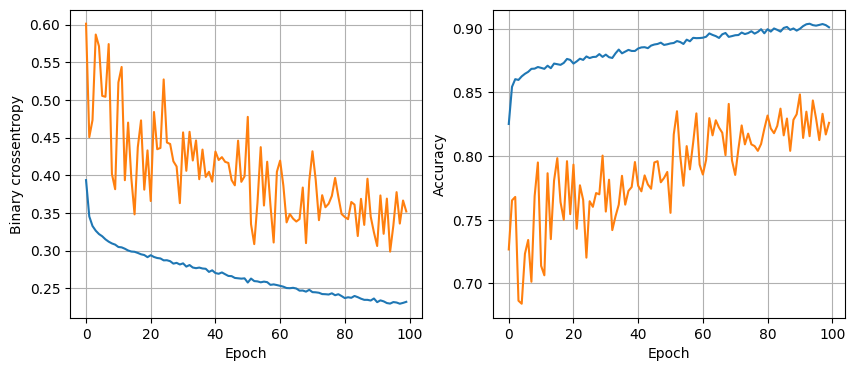

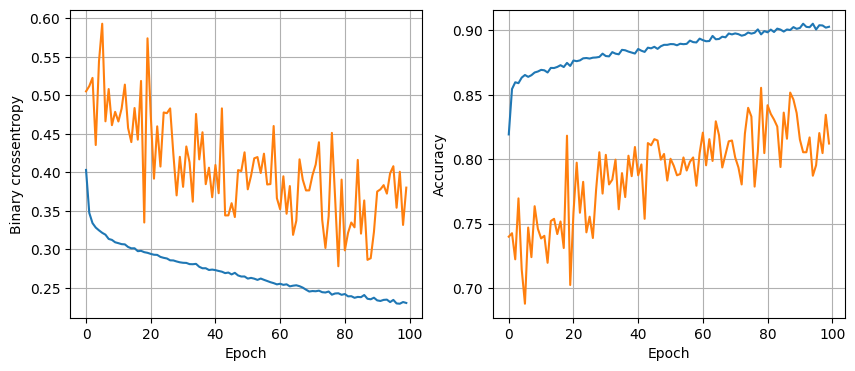

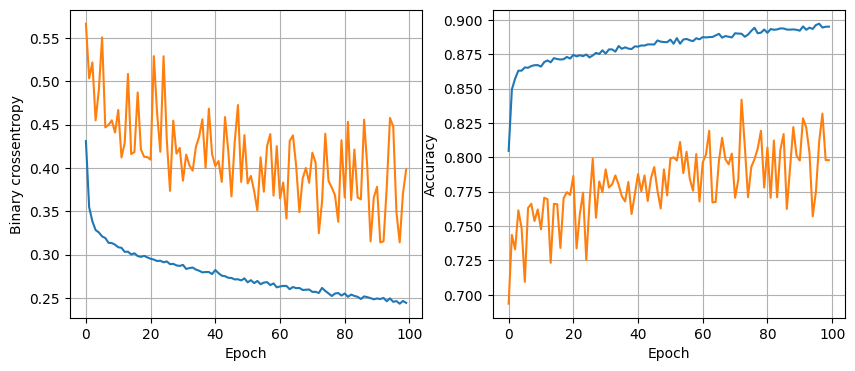

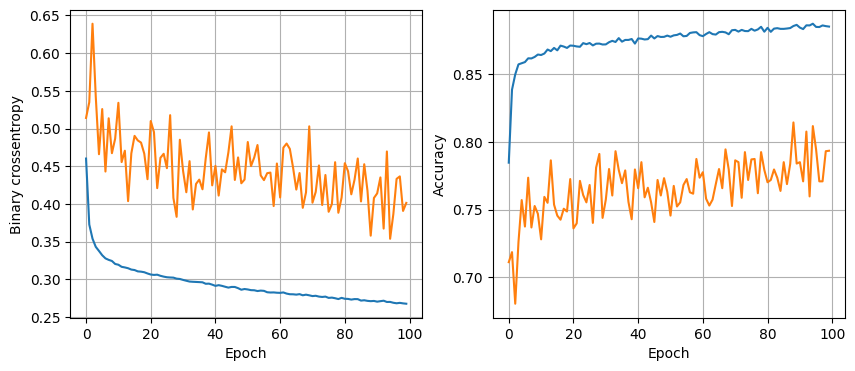

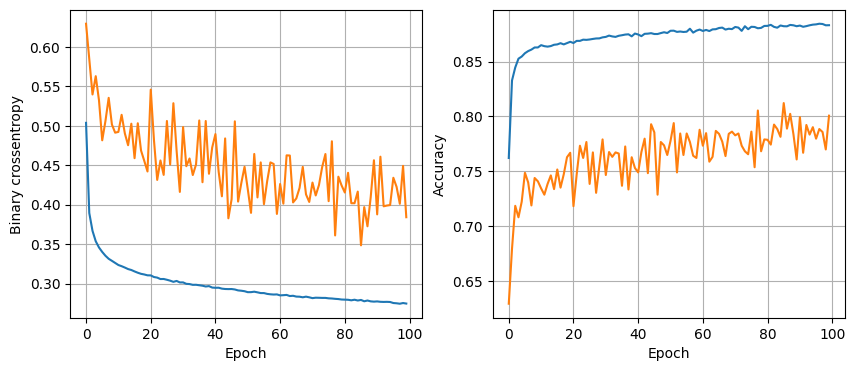

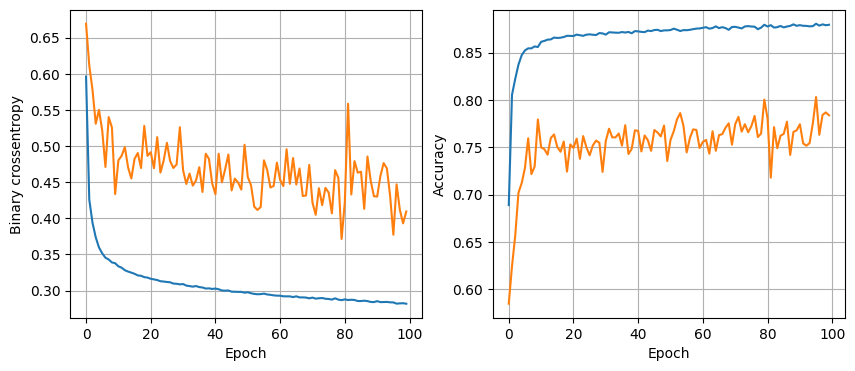

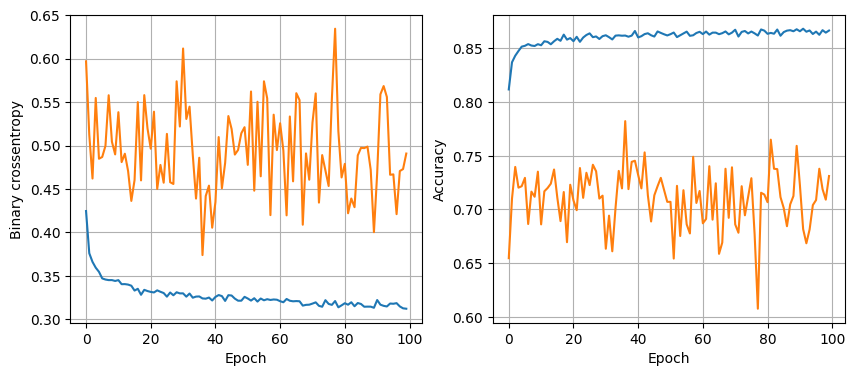

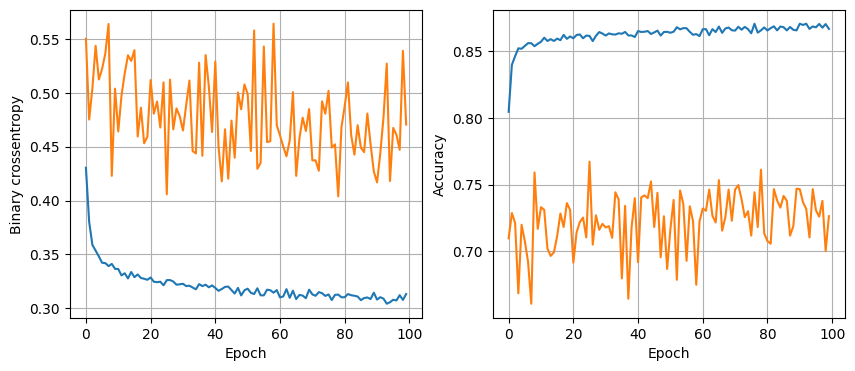

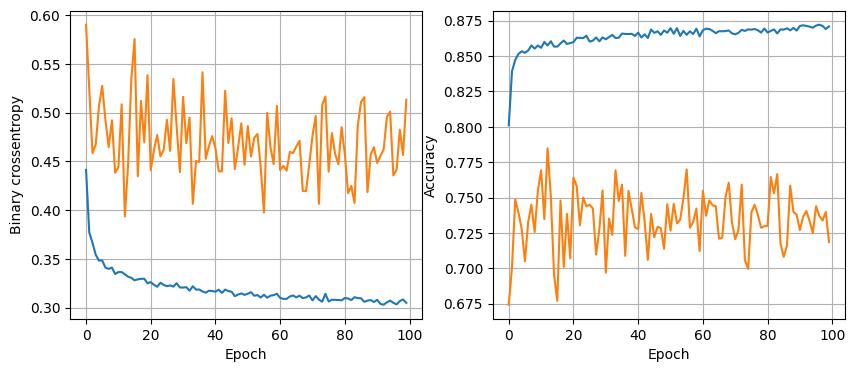

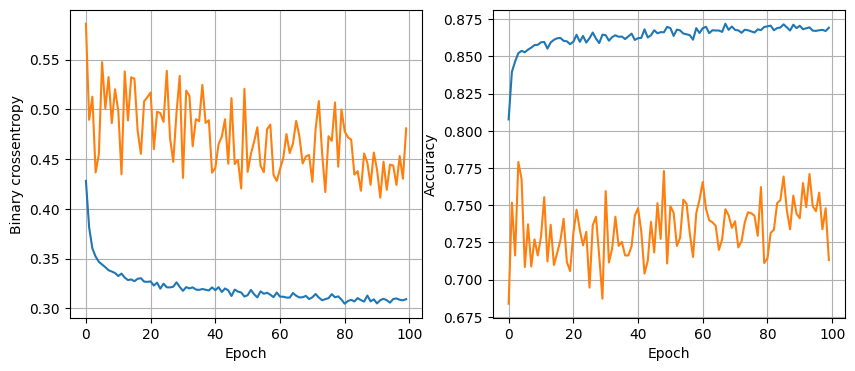

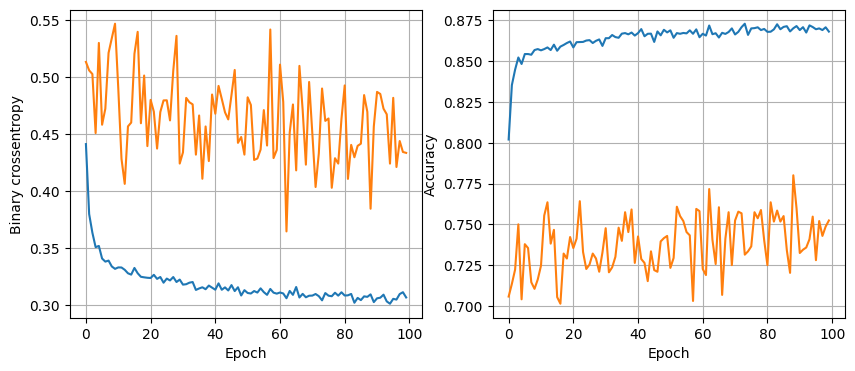

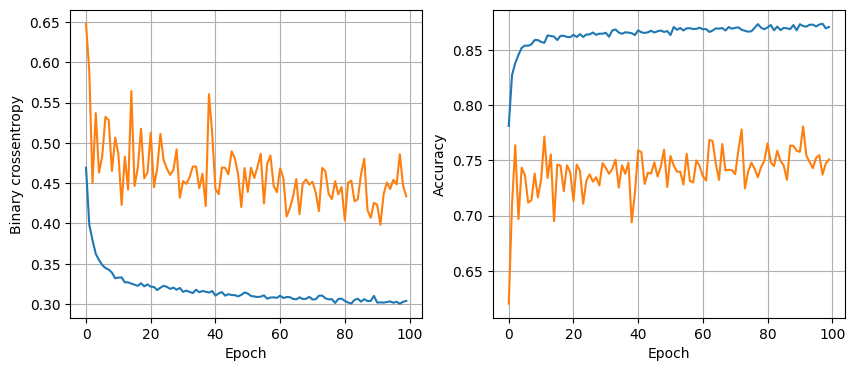

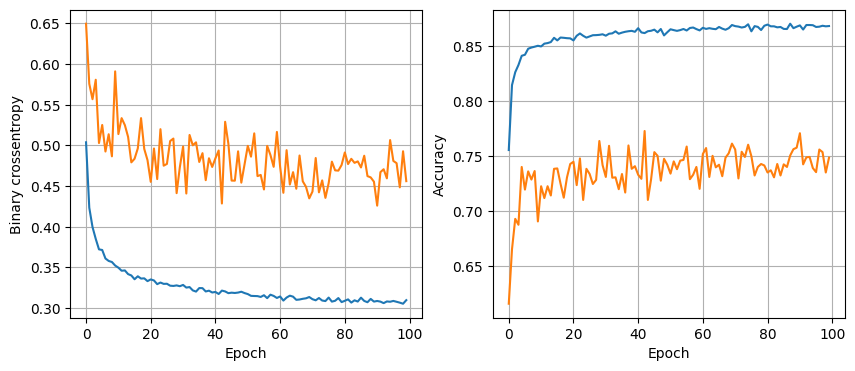

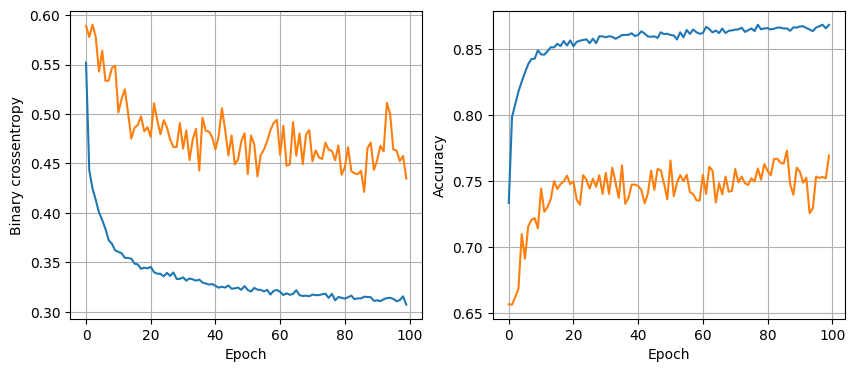

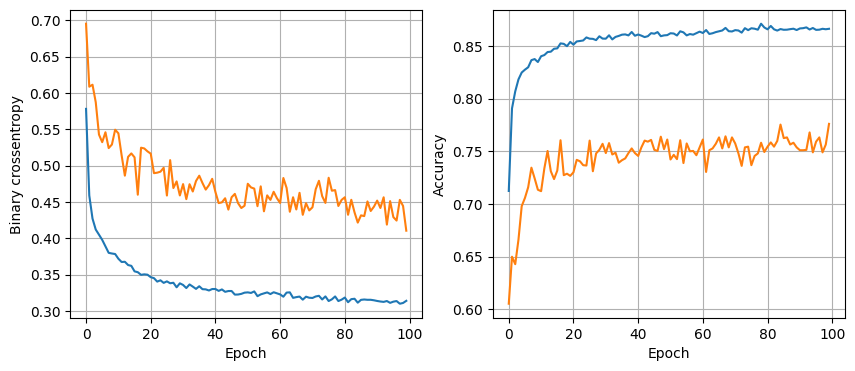

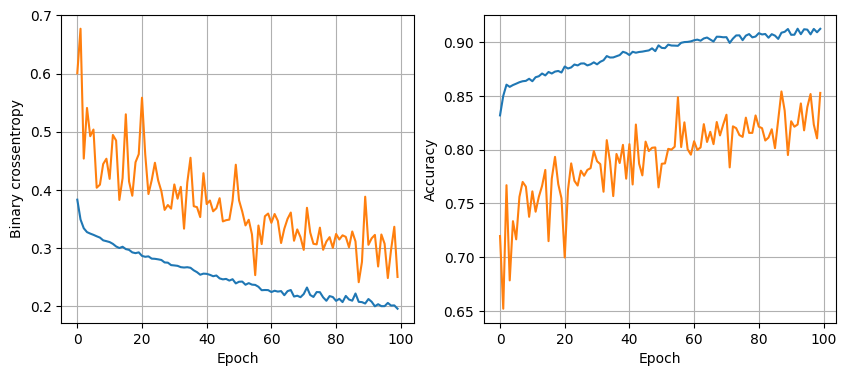

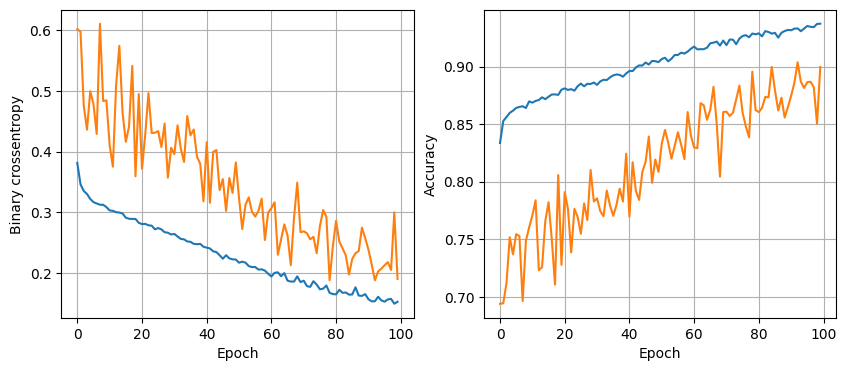

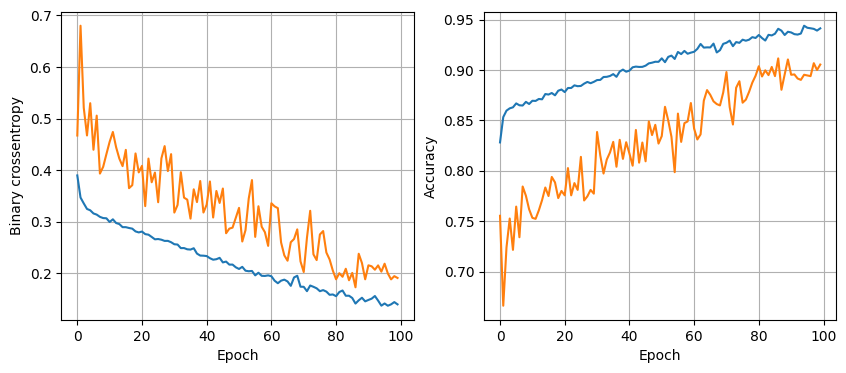

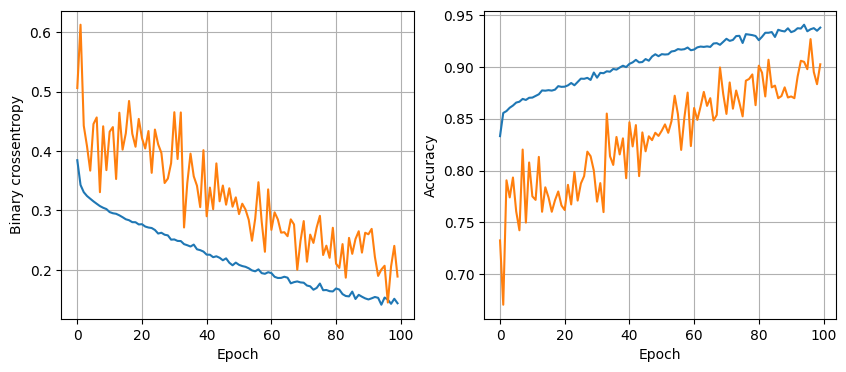

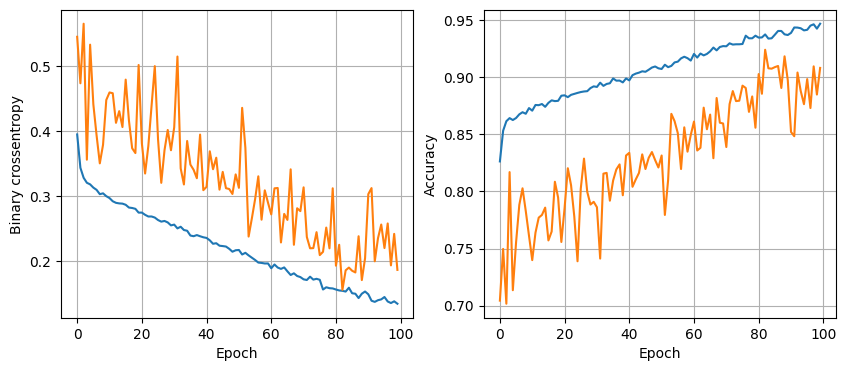

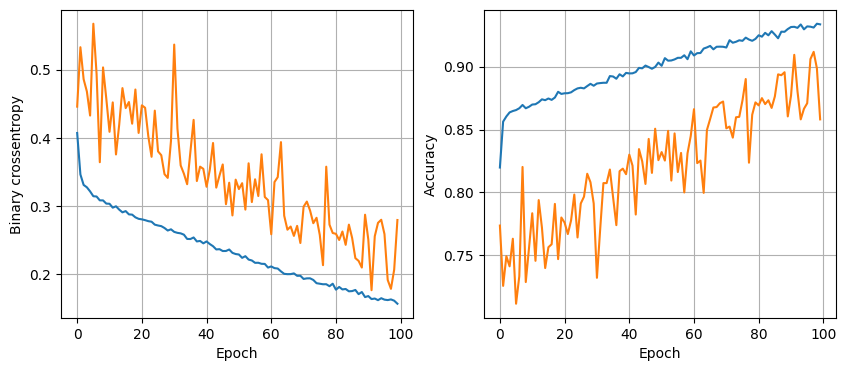

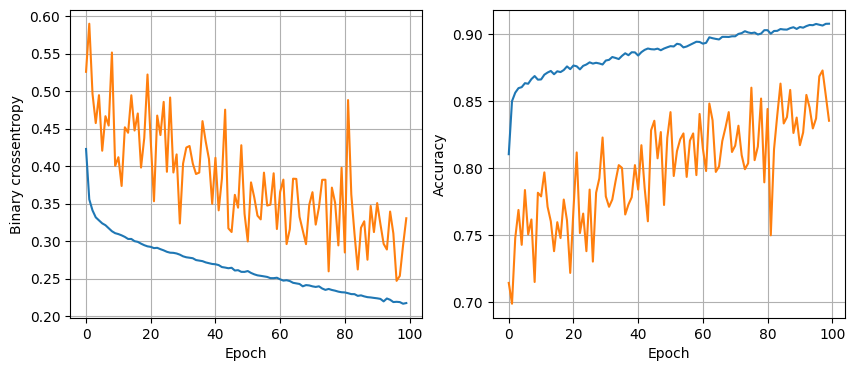

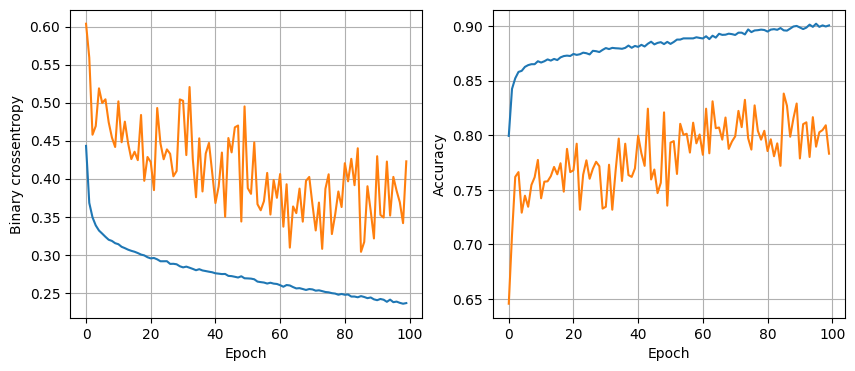

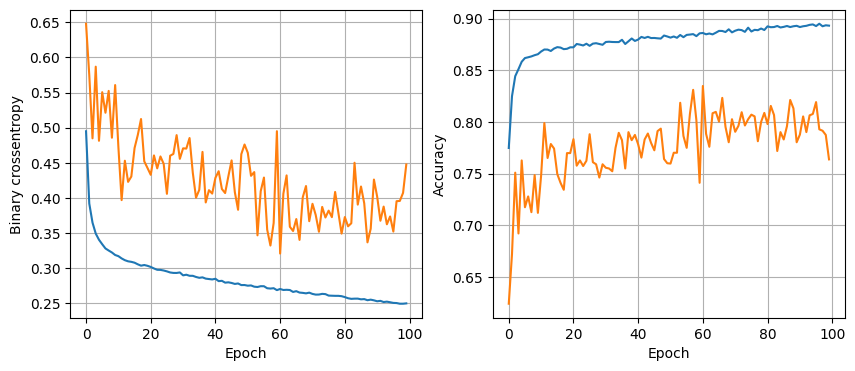

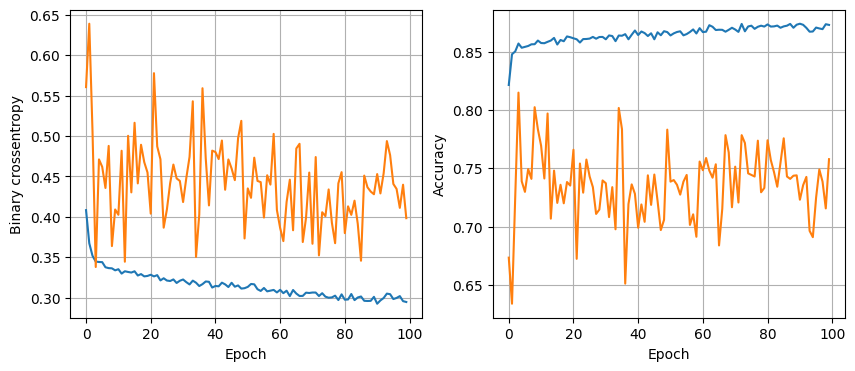

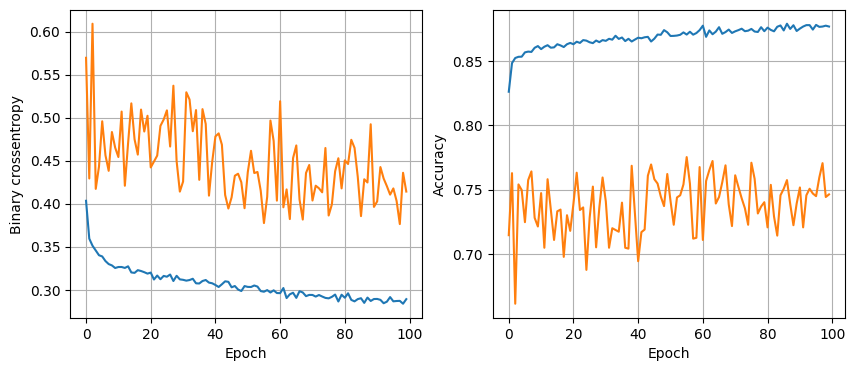

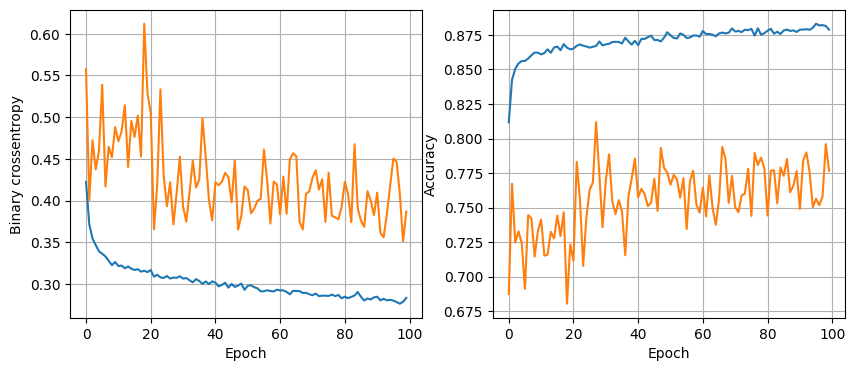

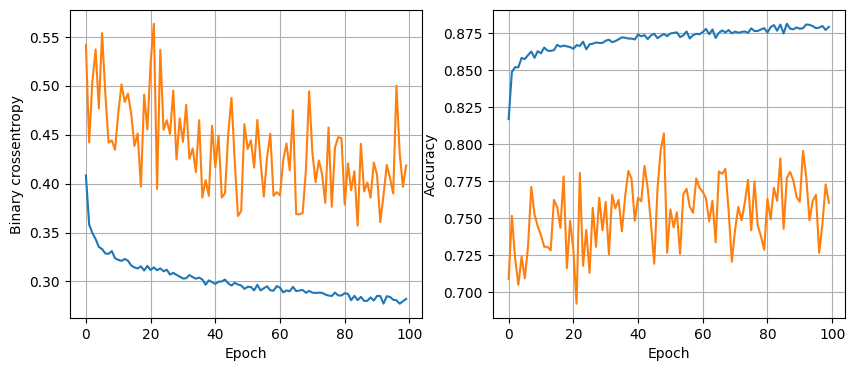

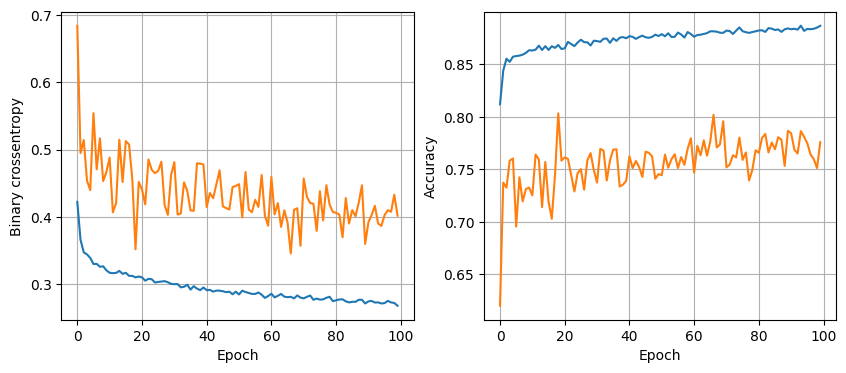

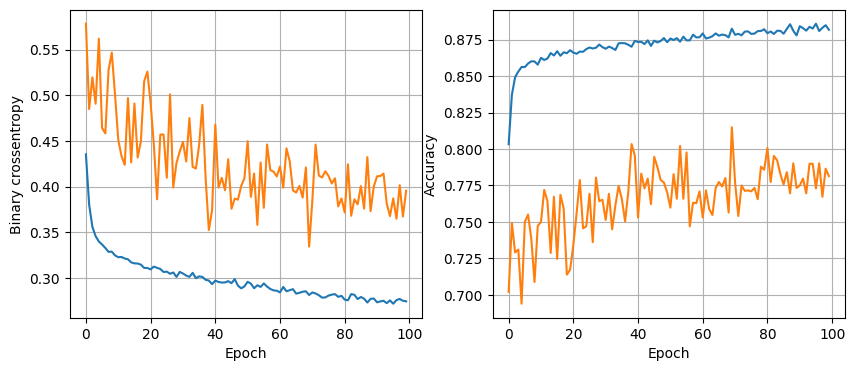

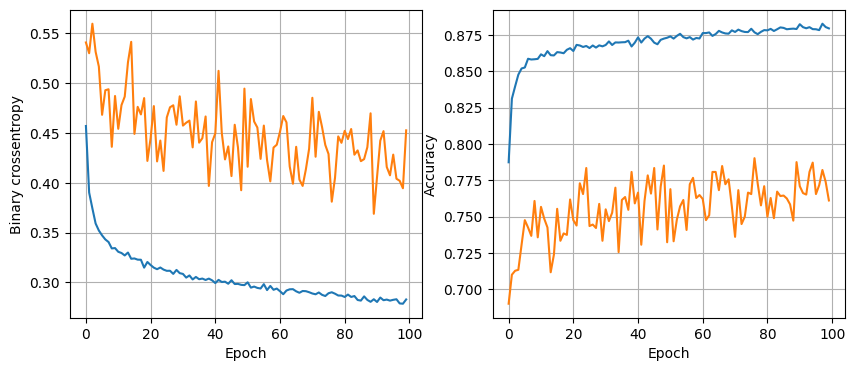

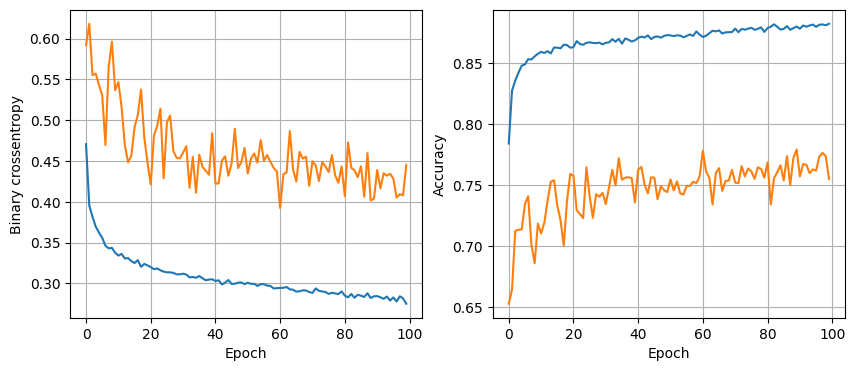

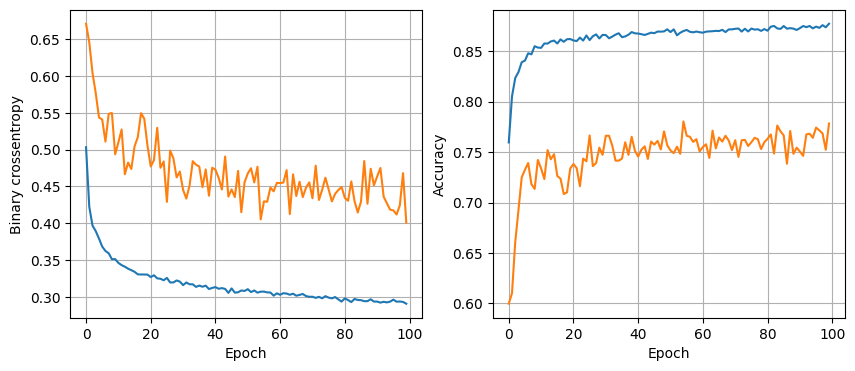

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

119/119 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1360
           1       0.86      0.96      0.91      2444

    accuracy                           0.88      3804
   macro avg       0.89      0.84      0.86      3804
weighted avg       0.88      0.88      0.87      3804

